# 1. Loading dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('un-general-debates-blueprint.csv.gz')

In [3]:
df.sample(3)

,session,year,country,country_name,speaker,position,text
2892,46,1991,AUS,Australia,Evans,NaN,"﻿I congratulate you, Sir, on your election as ..."
6857,67,2012,NER,Niger,Mohamed Bazoum,Minister for Foreign Affairs,﻿I would\nfirst like to congratulate the Presi...
3642,50,1995,IRN,"Iran, Islamic Republic of",Mr. Velayati,Minister for Foreign Affairs,May I at\nthe outset congratulate President Fr...


# 2. DataFrame summary statistics

In [4]:
df['length'] = df['text'].str.len()

In [5]:
df.columns

Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text', 'length'],
      dtype='object')

In [6]:
df.dtypes

session          int64
year             int64
country         object
country_name    object
speaker         object
position        object
text            object
length           int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
 7   length        7507 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 469.3+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


In [9]:
df[['country','speaker']].describe(include='O').T

,count,unique,top,freq
country,7507,199,AUT,46
speaker,7480,5428,Seyoum Mesfin,12


# 3. Checking for missing data

## Checking

In [10]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

## Fixing

In [11]:
df['speaker'].fillna('unknown',inplace=True)

In [12]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker            0
position        3005
text               0
length             0
dtype: int64

## More problems

In [13]:
df[df['speaker'].str.contains('Bush')]['speaker'].value_counts()

George W. Bush        4
Mr. George W. Bush    2
George Bush           1
Mr. George W Bush     1
Bush                  1
Name: speaker, dtype: int64

# 4. Plotting distributions

## Length distribution

<AxesSubplot:>

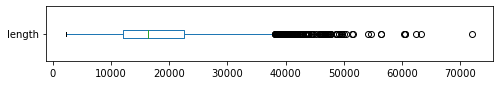

In [14]:
df['length'].plot(kind='box', vert=False, figsize=(8, 1))

<AxesSubplot:ylabel='Frequency'>

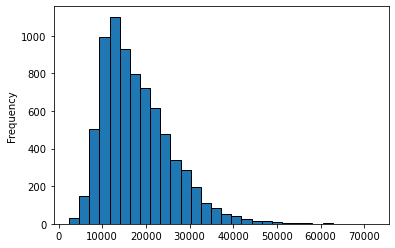

In [15]:
df['length'].plot(kind='hist', bins=30, figsize=(6, 4), edgecolor='k')

# 5. Distributions across categories

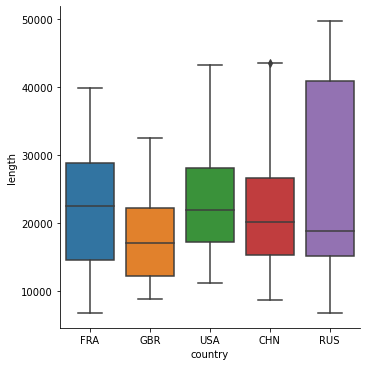

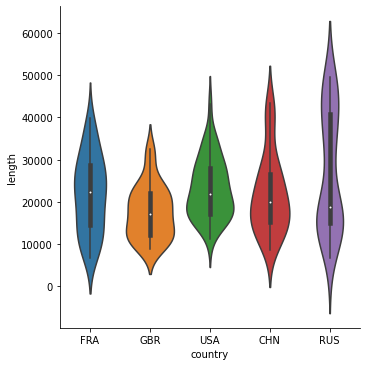

In [16]:
import seaborn as sns

where = df['country'].isin(['USA','FRA','GBR','CHN','RUS'])
sns.catplot(data=df[where], x='country', y='length', kind='box')
sns.catplot(data=df[where], x='country', y='length', kind='violin')

# 6. Development over time

<AxesSubplot:title={'center':'Number of Countries'}, xlabel='year'>

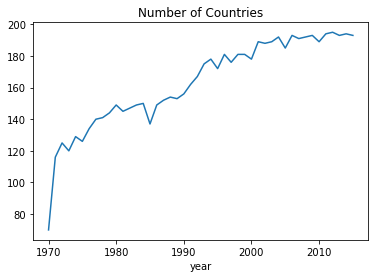

In [17]:
df.groupby('year').size().plot(title='Number of Countries')

<AxesSubplot:title={'center':'Avg. Speech Length'}, xlabel='year'>

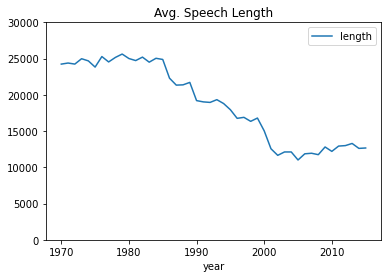

In [18]:
df.groupby('year').agg({'length':'mean'})\
  .plot(title='Avg. Speech Length', ylim=(0,30000))

# 7. Simple Text Processing
1. Case folding
2. Tokenization
3. Stop word removal

## 7.1 Case Folding

In [19]:
str.lower('Hello World!')

'hello world!'

## 7.2 Tokenization

In [20]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [21]:
text = "Let's defeat SARS-Cov-2 together in 2021!"
tokens = tokenize(text)
print("|".join(tokens))

Let|s|defeat|SARS-Cov-2|together|in


## 7.3 Stopword Removal

In [22]:
import nltk

stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [23]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [24]:
remove_stop(tokens)

['Let', 'defeat', 'SARS-Cov-2', 'together']

## 7.4 Processing a pipeline

In [25]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [26]:
prepare(text, pipeline)

['let', 'defeat', 'sars-cov-2', 'together']

## 7.5 Applying pipeline

In [27]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)
df.sample(3)

,session,year,country,country_name,speaker,position,text,length,tokens
3902,51,1996,TKM,Turkmenistan,Boris Shihmuradov,Deputy Prime Minister,"﻿Allow me, first of\nall, to congratulate Mr. ...",13824,"[allow, first, congratulate, mr, razali, ismai..."
3131,47,1992,KEN,Kenya,Mr. NDOLO AYAH,NaN,"First of all, let me join the other \nrepresen...",20175,"[first, let, join, representatives, spoken, co..."
6709,66,2011,TLS,Timor-Leste,Kay Rala Xanana Guzmao,Prime Minister,It is a great \npleasure for me to be back at ...,16920,"[great, pleasure, back, united, nations, headq..."


## 7.6 Counting number of tokens (words)

In [28]:
df['num_tokens'] = df['tokens'].map(len)

In [29]:
df.head()

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,51419,"[may, first, convey, president, congratulation...",4092
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,29286,"[fortunate, coincidence, precisely, time, unit...",2341
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,31839,"[pleasure, extend, mr, president, warmest, con...",2575
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,26616,"[may, begin, expressing, ambassador, hambro, b...",2166
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...",25911,"[doubt, us, coming, rostrum, wonders, usefulne...",2064


# 8. Word Frequency Analysis

In [30]:
from collections import Counter

tokens = tokenize("She likes my cats and my cats like my sofa")

counter = Counter(tokens)
print(counter)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


In [31]:
more_tokens = tokenize("She likes dogs and cats")
counter.update(more_tokens)
print(counter)

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


In [32]:
%%time
import numpy as np
tokens = df['tokens'].explode().values
counter = Counter(tokens)
print(counter.most_common(5))


[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]
Wall time: 17.1 s


In [33]:
%%time
counter = Counter()

df['tokens'].map(counter.update)

print(counter.most_common(5))

[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]
Wall time: 2.01 s


# 9. Word Counting, DataFrame version

In [34]:
def count_words(df, column='tokens', preprocess=None, min_freq = 2):
    
    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
    
    # create counter and run through all data
    counter = Counter()
    df[column].map(update)
    
    # transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq > @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [35]:
freq_df = count_words(df)
freq_df

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
...,...
meadows,3
unidcp,3
lucio,3


In [36]:
# count words with 10 or more characters
count_words(df, column='text',
           preprocess=lambda text: re.findall(r"\w{10,}", text))

,freq
token,
international,106974
development,51334
Government,35528
Organization,33763
developing,25177
...,...
preexisting,3
correlations,3
empirically,3


# 10. Frequency plot

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

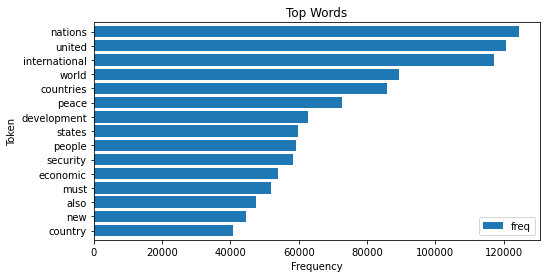

In [37]:
ax = freq_df.head(15).plot(kind='barh', width=0.8, figsize=(8,4))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

# 11. Word Clouds

In [38]:
!pip install wordcloud

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = df.query("year==2015 and country=='USA'")['text'].values[0]
text

'Seventy years after the founding of the United Nations it is worth reflecting on what the members of this body, working together, have helped to achieve. Out of the ashes of the Second World War, having witnessed the unthinkable power of the atomic age, the United States has worked with many nations in the Assembly to prevent a third world war — by forging alliances with old adversaries; by supporting the steady emergence of strong democracies accountable to their people and not to any foreign Power; and by building an international system that imposes a cost on those who choose conflict over cooperation, an order that recognizes the dignity and equal worth of all people.\nThat has been the work of seven decades. That is the ideal that this body has, at its best, pursued. Of course, there have been too many times when, collectively, we have fallen short of those ideals. Over the seven decades, terrible conflicts have claimed untold victims. But we have pressed forward, slowly, steadil

(-0.5, 399.5, 199.5, -0.5)

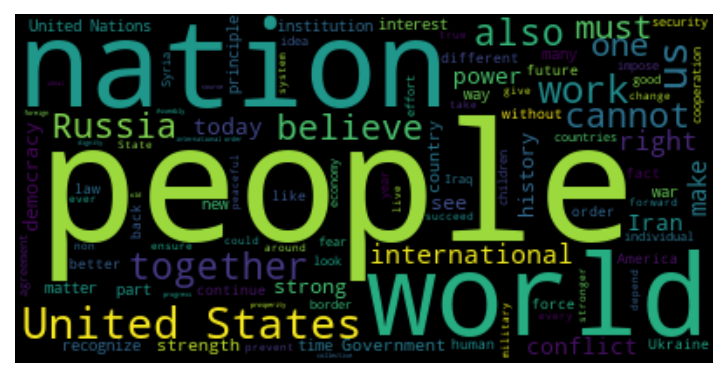

In [40]:
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.figure(dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

## Word Cloud framework

In [41]:
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

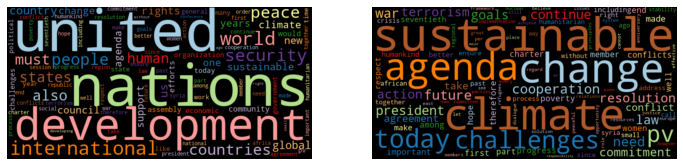

In [42]:
freq_2015_df = count_words(df[df['year']==2015])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)###
wordcloud(freq_2015_df['freq'], max_words=100)
plt.subplot(1,2,2)###
wordcloud(freq_2015_df['freq'], max_words=100, stopwords=freq_df.head(50).index)
#plt.tight_layout()###

# 12. Finding a Keyword-in-Context

In [43]:
!pip install textacy

In [44]:
from textacy.extract.kwic import keyword_in_context
import random

def kwic(doc_series, keyword, window=35, print_samples=5):
    
    def add_kwic(text):
        kwic_list.extend(keyword_in_context(text, keyword, ignore_case=True, window_width=window))
    
    kwic_list = []
    doc_series.map(add_kwic)
    
    if print_samples is None or print_samples==0:
        return kwic_list
    else:
        k = min(print_samples, len(kwic_list))
        print(f"{k} random samples out of {len(kwic_list)} " + \
              f"contexts for '{keyword}':")
        for sample in random.sample(list(kwic_list), k):
            print(re.sub(r'[\n\t]', ' ', sample[0]) + '  ' + \
                  sample[1]+'  ' +\
                  re.sub(r'[\n\t]',' ', sample[2]))

In [45]:
kwic(df[df['year']==2015]['text'], 'sdgs', print_samples=5)

5 random samples out of 73 contexts for 'sdgs':
 country-led implementation of the   SDGs  . Since 2012, Sierra Leone has been
transformative agenda. Many of the   SDGs   will not be attainable if we do no
 of Sustainable Development Goals (  SDGs  ), which are profoundly interlinked
a safer world. We believe that the   SDGs   are about building a fairer, safer
city to successfully implement the   SDGs   for our planet, for prosperity tod


# 13. N-gram

In [46]:
def ngrams(tokens, n=2, sep=' '):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]

In [47]:
text = "the visible manifestation of the global climate change"
tokens = tokenize(text)
print("|".join(ngrams(tokens,2)))

the visible|visible manifestation|manifestation of|of the|the global|global climate|climate change


# 14. N-gram with stopword

In [48]:
def ngrams(tokens, n=2, sep=' ', stopwords=set()):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
           if len([t for t in ngram if t in stopwords])==0]

In [49]:
text = "the visible manifestation of the global climate change"
tokens = tokenize(text)
print("|".join(ngrams(tokens,2, stopwords=stopwords)))

visible manifestation|global climate|climate change


# 15. Comparing frequencies across time intervals and categories

In [50]:
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [51]:
keywords = ['nuclear','terrorism','climate','freedom']
tokens = ['nuclear','climate','climate','freedom','climate','freedom']

print(count_keywords(tokens, keywords))

[1, 0, 3, 2]


In [52]:
def count_keywords_by(df, by, keywords, column='tokens'):
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by]
    
    return freq_df.groupby(by).sum().sort_values(by)

In [53]:
freq_df = count_keywords_by(df, by='year', keywords=keywords)

In [54]:
freq_df

,nuclear,terrorism,climate,freedom
year,,,,
1970,192,7,18,128
1971,275,9,35,205
1972,393,379,74,280
1973,347,124,79,266
1974,478,24,71,316
1975,578,20,53,232
1976,451,146,57,347
1977,675,75,58,321
1978,550,82,52,309


<AxesSubplot:xlabel='year'>

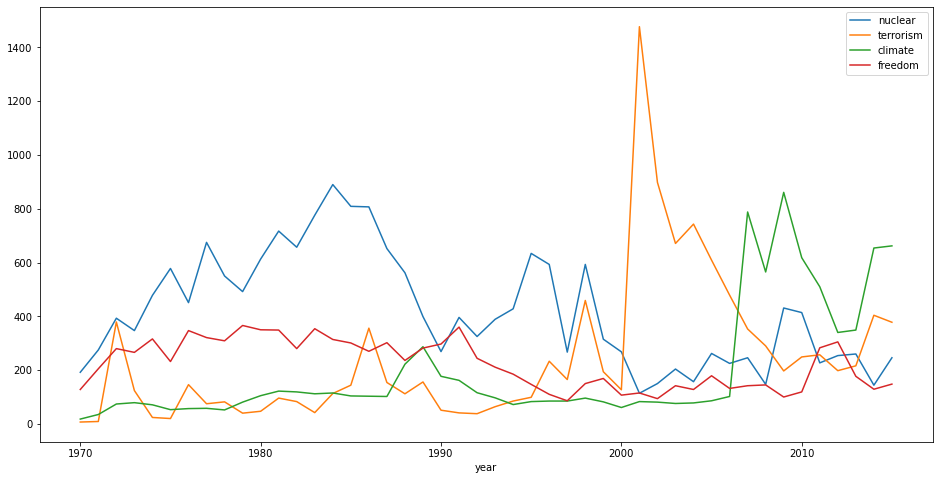

In [55]:
freq_df.plot(kind='line', figsize=(16,8))

---

## Lab

### 1. Find the top 10 word bigram from UN General Debates of years 1970 –1990 and compare with those of years 1990 –the latest (remove stopwords first)

In [56]:
df.head()

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,51419,"[may, first, convey, president, congratulation...",4092
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,29286,"[fortunate, coincidence, precisely, time, unit...",2341
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,31839,"[pleasure, extend, mr, president, warmest, con...",2575
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,26616,"[may, begin, expressing, ambassador, hambro, b...",2166
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...",25911,"[doubt, us, coming, rostrum, wonders, usefulne...",2064


In [57]:
def ngrams(tokens, n=2, sep=' '):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]

In [58]:
pipeline = [str.lower, tokenize, remove_stop,ngrams]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [59]:
def count_words(df, column='bigrams', preprocess=None, min_freq = 2):
    
    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
    
    # create counter and run through all data
    counter = Counter()
    df[column].map(update)
    
    # transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq > @min_freq')
    freq_df.index.name = 'bigrams'
    
    return freq_df.sort_values('freq', ascending=False)

In [60]:
df['bigrams'] = df['text'].apply(prepare, pipeline=pipeline)

In [61]:
df.head()

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens,bigrams
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,51419,"[may, first, convey, president, congratulation...",4092,"[may first, first convey, convey president, pr..."
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,29286,"[fortunate, coincidence, precisely, time, unit...",2341,"[fortunate coincidence, coincidence precisely,..."
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,31839,"[pleasure, extend, mr, president, warmest, con...",2575,"[pleasure extend, extend mr, mr president, pre..."
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,26616,"[may, begin, expressing, ambassador, hambro, b...",2166,"[may begin, begin expressing, expressing ambas..."
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...",25911,"[doubt, us, coming, rostrum, wonders, usefulne...",2064,"[doubt us, us coming, coming rostrum, rostrum ..."


In [62]:
bigram_1 = df.query('1970 <= year <= 1990')
bigram_2 = df.query('year >= 1990')

In [63]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h3>{title}</h3>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [64]:
df_bigram_1 = count_words(bigram_1, column='bigrams').head(10)
df_bigram_2 = count_words(bigram_2, column='bigrams').head(10)
display_side_by_side(df_bigram_1,df_bigram_2,titles=['10 word of years 1970–1990','10 word of years 1970- the latest'])

,freq
bigrams,
united nations,43846
general assembly,13915
developing countries,11991
international community,11506
south africa,9300
united states,7718
middle east,7608
security council,7500
peace security,6755


### 2. Create a bigram word cloud of the UN General Debates dataset of years 1970 –1990 and 1990 to the latest (remove stopwords first)

In [65]:
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Set2", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

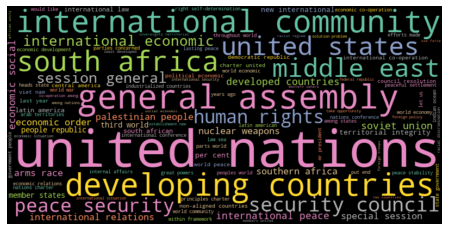

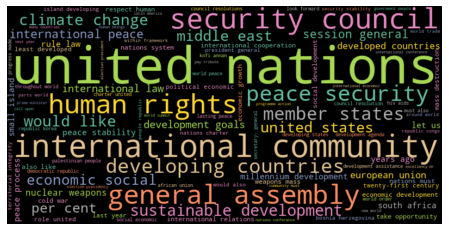

In [66]:
freq_bigram_1 = count_words(bigram_1)
freq_bigram_2 = count_words(bigram_2)
plt.figure(figsize=(14,4))
wordcloud(freq_bigram_1['freq'], max_words=100)

plt.figure(figsize=(14,4))
wordcloud(freq_bigram_2['freq'], max_words=100)

### 3. Create a trend graph showing the bigram and word trend of “climate change”, “global warming”, “wars” and 3 others of your choices

In [67]:
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [68]:
def count_keywords_by(df, by, keywords, column='bigrams'):
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by]
    
    return freq_df.groupby(by).sum().sort_values(by)

In [69]:
keywords = ['climate change','global warming','wars','human rights','peace security','economic social']

In [70]:
freq_df = count_keywords_by(df, by='year', keywords=keywords)

<AxesSubplot:xlabel='year'>

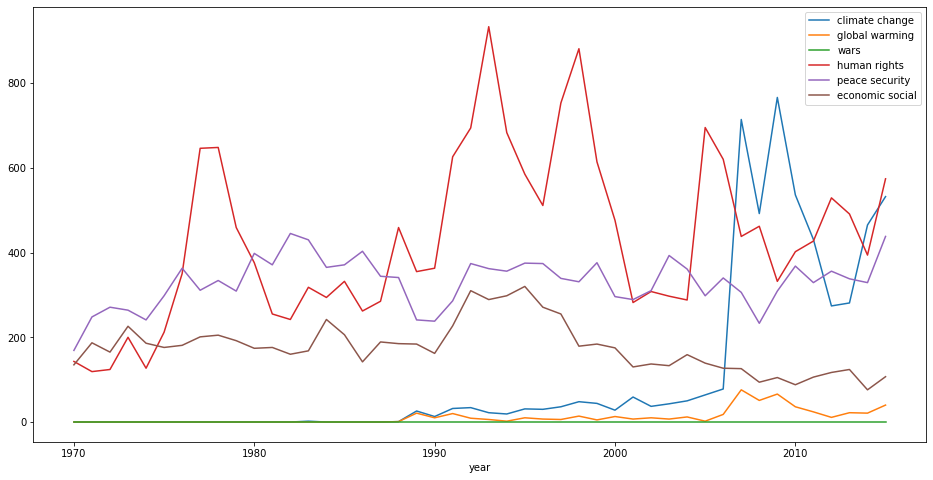

In [71]:
freq_df.plot(kind='line', figsize=(16,8))

### Plot graph of Simple Moving Average (SMA) 

In [72]:
df_mv_average = freq_df.rolling(window=20, min_periods=1).mean()

<AxesSubplot:xlabel='year'>

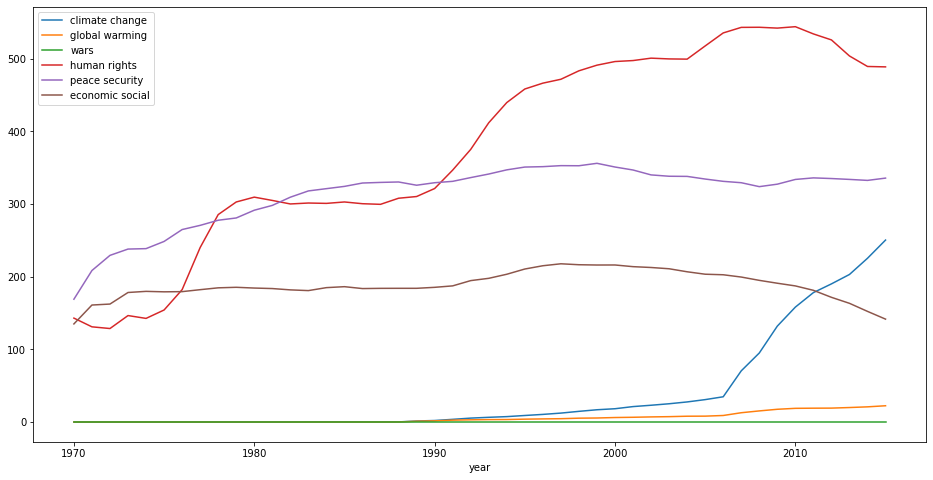

In [73]:
df_mv_average.plot(kind='line', figsize=(16,8))